In [ ]:
# конвертация типов изображений (rgb2hsv, rgba2rgb)

In [1]:
from skimage import color
import numpy as np
# bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
color.rgb2hsv(red_pixel_rgb)

array([[[0., 1., 1.]]])

In [2]:
# darker saturated blue
dark_blue_pixel_rgb = np.array([[[0, 0, 100]]], dtype=np.uint8)
color.rgb2hsv(dark_blue_pixel_rgb)

array([[[0.66666667, 1.        , 0.39215686]]])

In [3]:
# less saturated pink
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
color.rgb2hsv(pink_pixel_rgb)

array([[[0.83333333, 0.60784314, 1.        ]]])

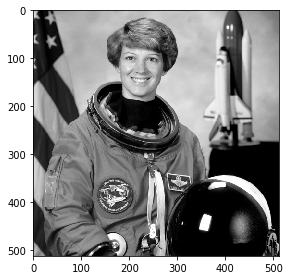

In [4]:
from skimage.color import rgb2gray
from skimage import data, io
img = data.astronaut()
img_gray = rgb2gray(img)
io.imshow(img_gray)

500
500


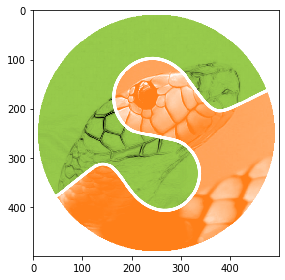

In [5]:
from skimage.color import rgba2rgb
from skimage import data, io
img_rgba = data.logo()
print(len(img_rgba))
img_rgb = rgba2rgb(img_rgba)
print(len(img_rgb))
io.imshow(img_rgb)

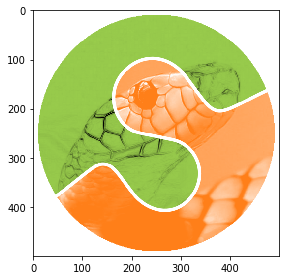

In [6]:
io.imshow(data.logo())

In [7]:
(data.logo())

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [8]:
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
color.rgb2gray(red_pixel)


array([[0.2125]])

In [9]:
green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
color.rgb2gray(green_pixel)

array([[0.7154]])

In [ ]:
#инвертация цвета изображения

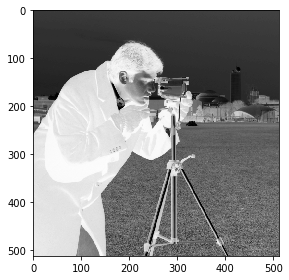

In [10]:
from skimage import util
img = data.camera()
inverted_img = util.invert(img)
from skimage import io
io.imshow(inverted_img)

In [11]:
#Тонировка серых изображений

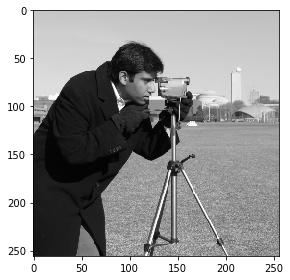

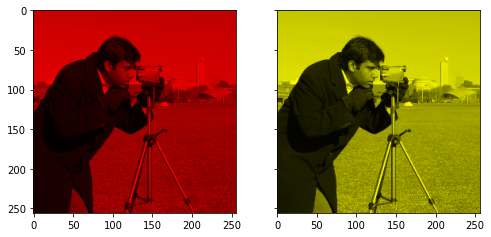

In [16]:
#Tinting gray-scale images
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import img_as_float, img_as_ubyte

grayscale_image = img_as_float(data.camera()[::2, ::2])
image = color.gray2rgb(grayscale_image)
io.imshow(image)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)

plt.show()

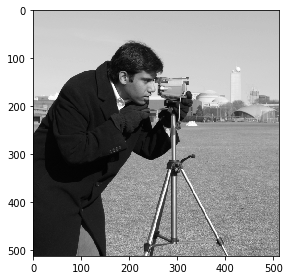

In [13]:
io.imshow(data.camera())

In [14]:
 #воспроизводим линейный градиент, при этом насыщенность и значение увеличиваются

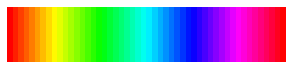

In [20]:
import numpy as np

hue_gradient = np.linspace(0, 1)

hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = color.hsv2rgb(hsv)

fig, ax = plt.subplots(figsize=(5, 2))
# Set image extent so hues go from 0 to 1 and the image is a nice aspect ratio.
ax.imshow(all_hues, extent=(0 - 0.5 / len(hue_gradient),
                            1 + 0.5 / len(hue_gradient), 0, 0.2))
ax.set_axis_off()

In [ ]:
#Тонировка серых изображений

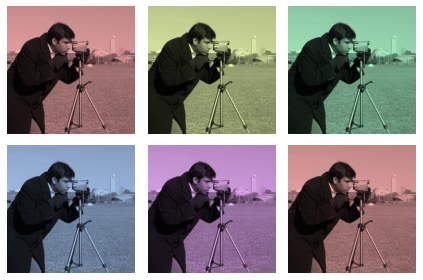

In [24]:
def colorize(image, hue, saturation=1):
    """ Add color of the given hue to an RGB image.

    By default, set the saturation to 1 so that the colors pop!
    """
    hsv = color.rgb2hsv(image)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)


hue_rotations = np.linspace(0, 1, 6)
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(image, hue, saturation=0.3)
    ax.imshow(tinted_image, vmin=0, vmax=1)
    ax.set_axis_off()
fig.tight_layout()

In [ ]:
#Выделения сильных участков серого с помощью функции skimage.rank.entropy()

array([[0.73333333, 0.        , 0.        ],
       [0.75294118, 0.        , 0.        ],
       [0.74509804, 0.        , 0.        ],
       ...,
       [0.56862745, 0.        , 0.        ],
       [0.54509804, 0.        , 0.        ],
       [0.55294118, 0.        , 0.        ]])

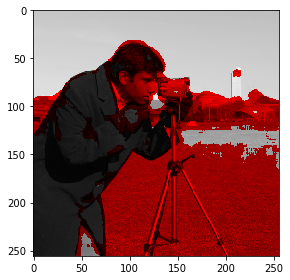

In [50]:
from skimage.filters import rank
# Create a mask selecting regions with interesting texture.
# print(grayscale_image)
noisy = rank.entropy(img_as_ubyte(grayscale_image), np.ones((9, 9)))
# print(noisy)
textured_regions = noisy > 4.25
# print(textured_regions)
# Note that using `colorize` here is a bit more difficult, since `rgb2hsv`
# expects an RGB image (height x width x channel), but fancy-indexing returns
# a set of RGB pixels (# pixels x channel).
masked_image = image.copy()
# print(masked_image)
masked_image[textured_regions, :] *= red_multiplier
io.imshow(masked_image)
masked_image[textured_regions]
# io.imshow(masked_image[textured_regions, :] * [1,0,0])